# DBSCAN и примеры кластеризации данных

## Данные: Wholesale customers Data Set


Источник данных: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Описание атрибутов:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


----- 

## Исследование данных

#### График scatterplot, отображающий зависимость между переменными MILK и GROCERY

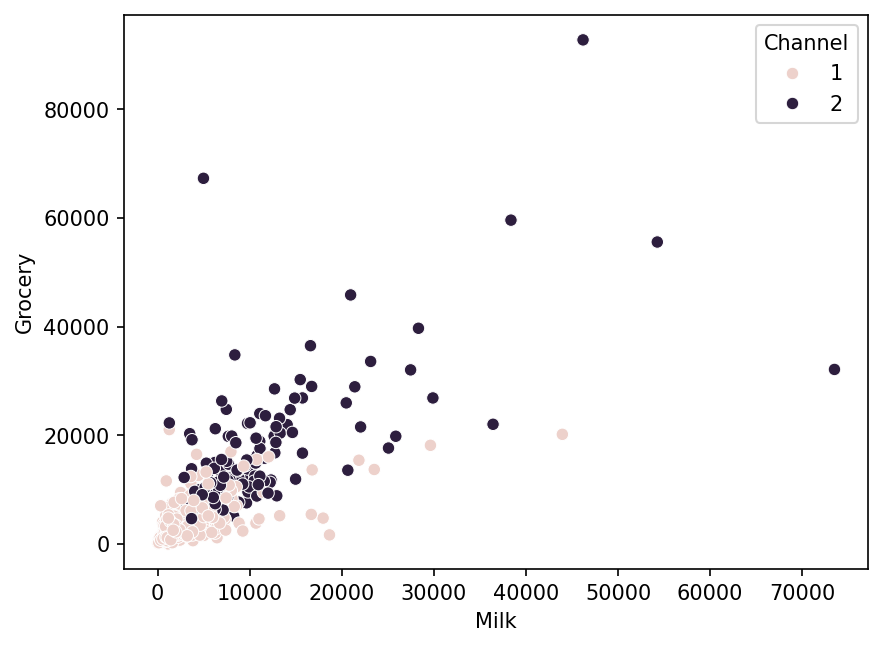

In [13]:
plt.figure(dpi = 150)
sns.scatterplot (data = df, x = 'Milk', y = 'Grocery', hue = 'Channel');

#### Гистограмма для колонки MILK

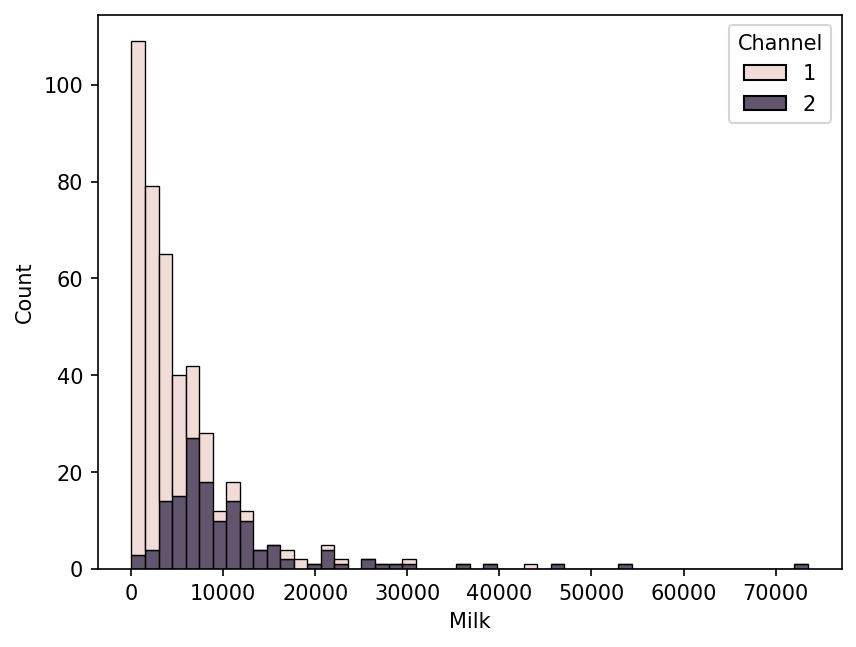

In [28]:
plt.figure(dpi = 150)
sns.histplot (data = df, x = 'Milk', hue = 'Channel', multiple= 'stack');

#### График clustermap для корреляций расходов по различным категориям

In [30]:
dfForClustMap = df.drop (['Channel', 'Region'], axis = 1)

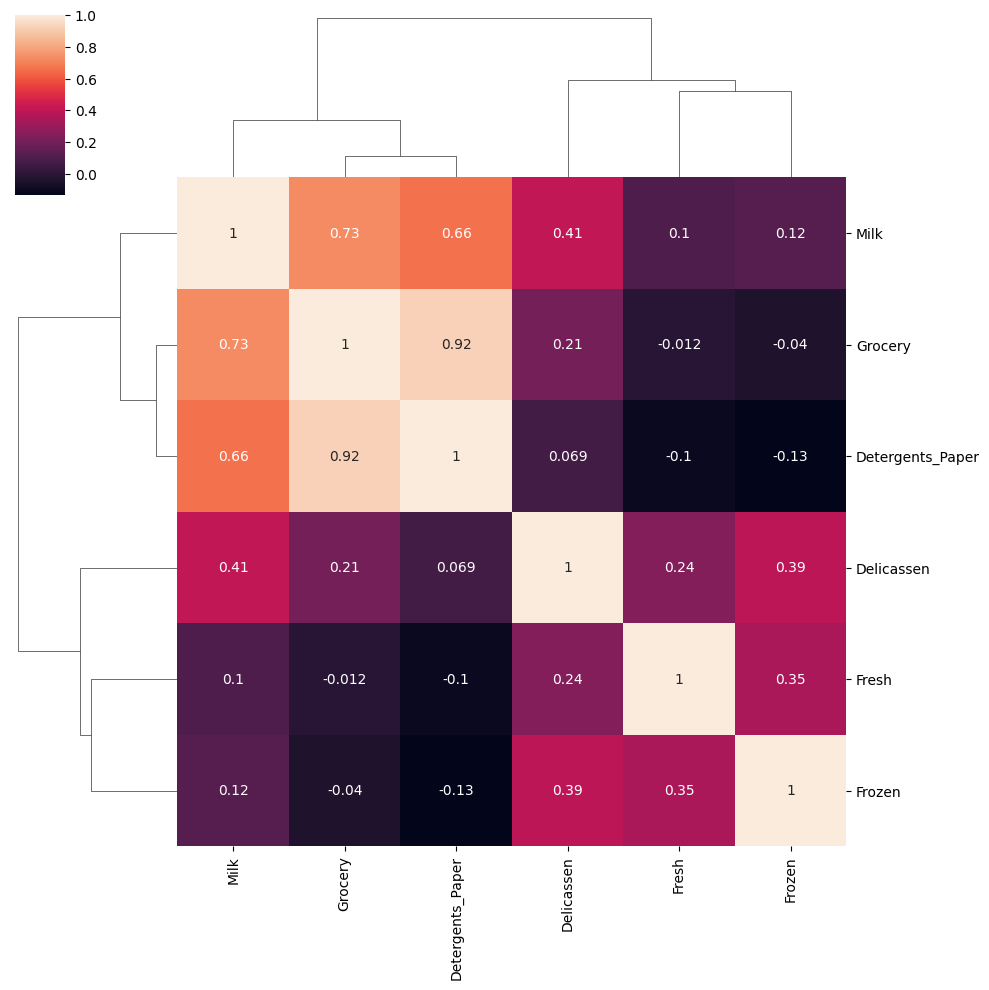

In [38]:
sns.clustermap(data = dfForClustMap.corr(), annot = True);

#### График PairPlot для всех колонок датафрейма

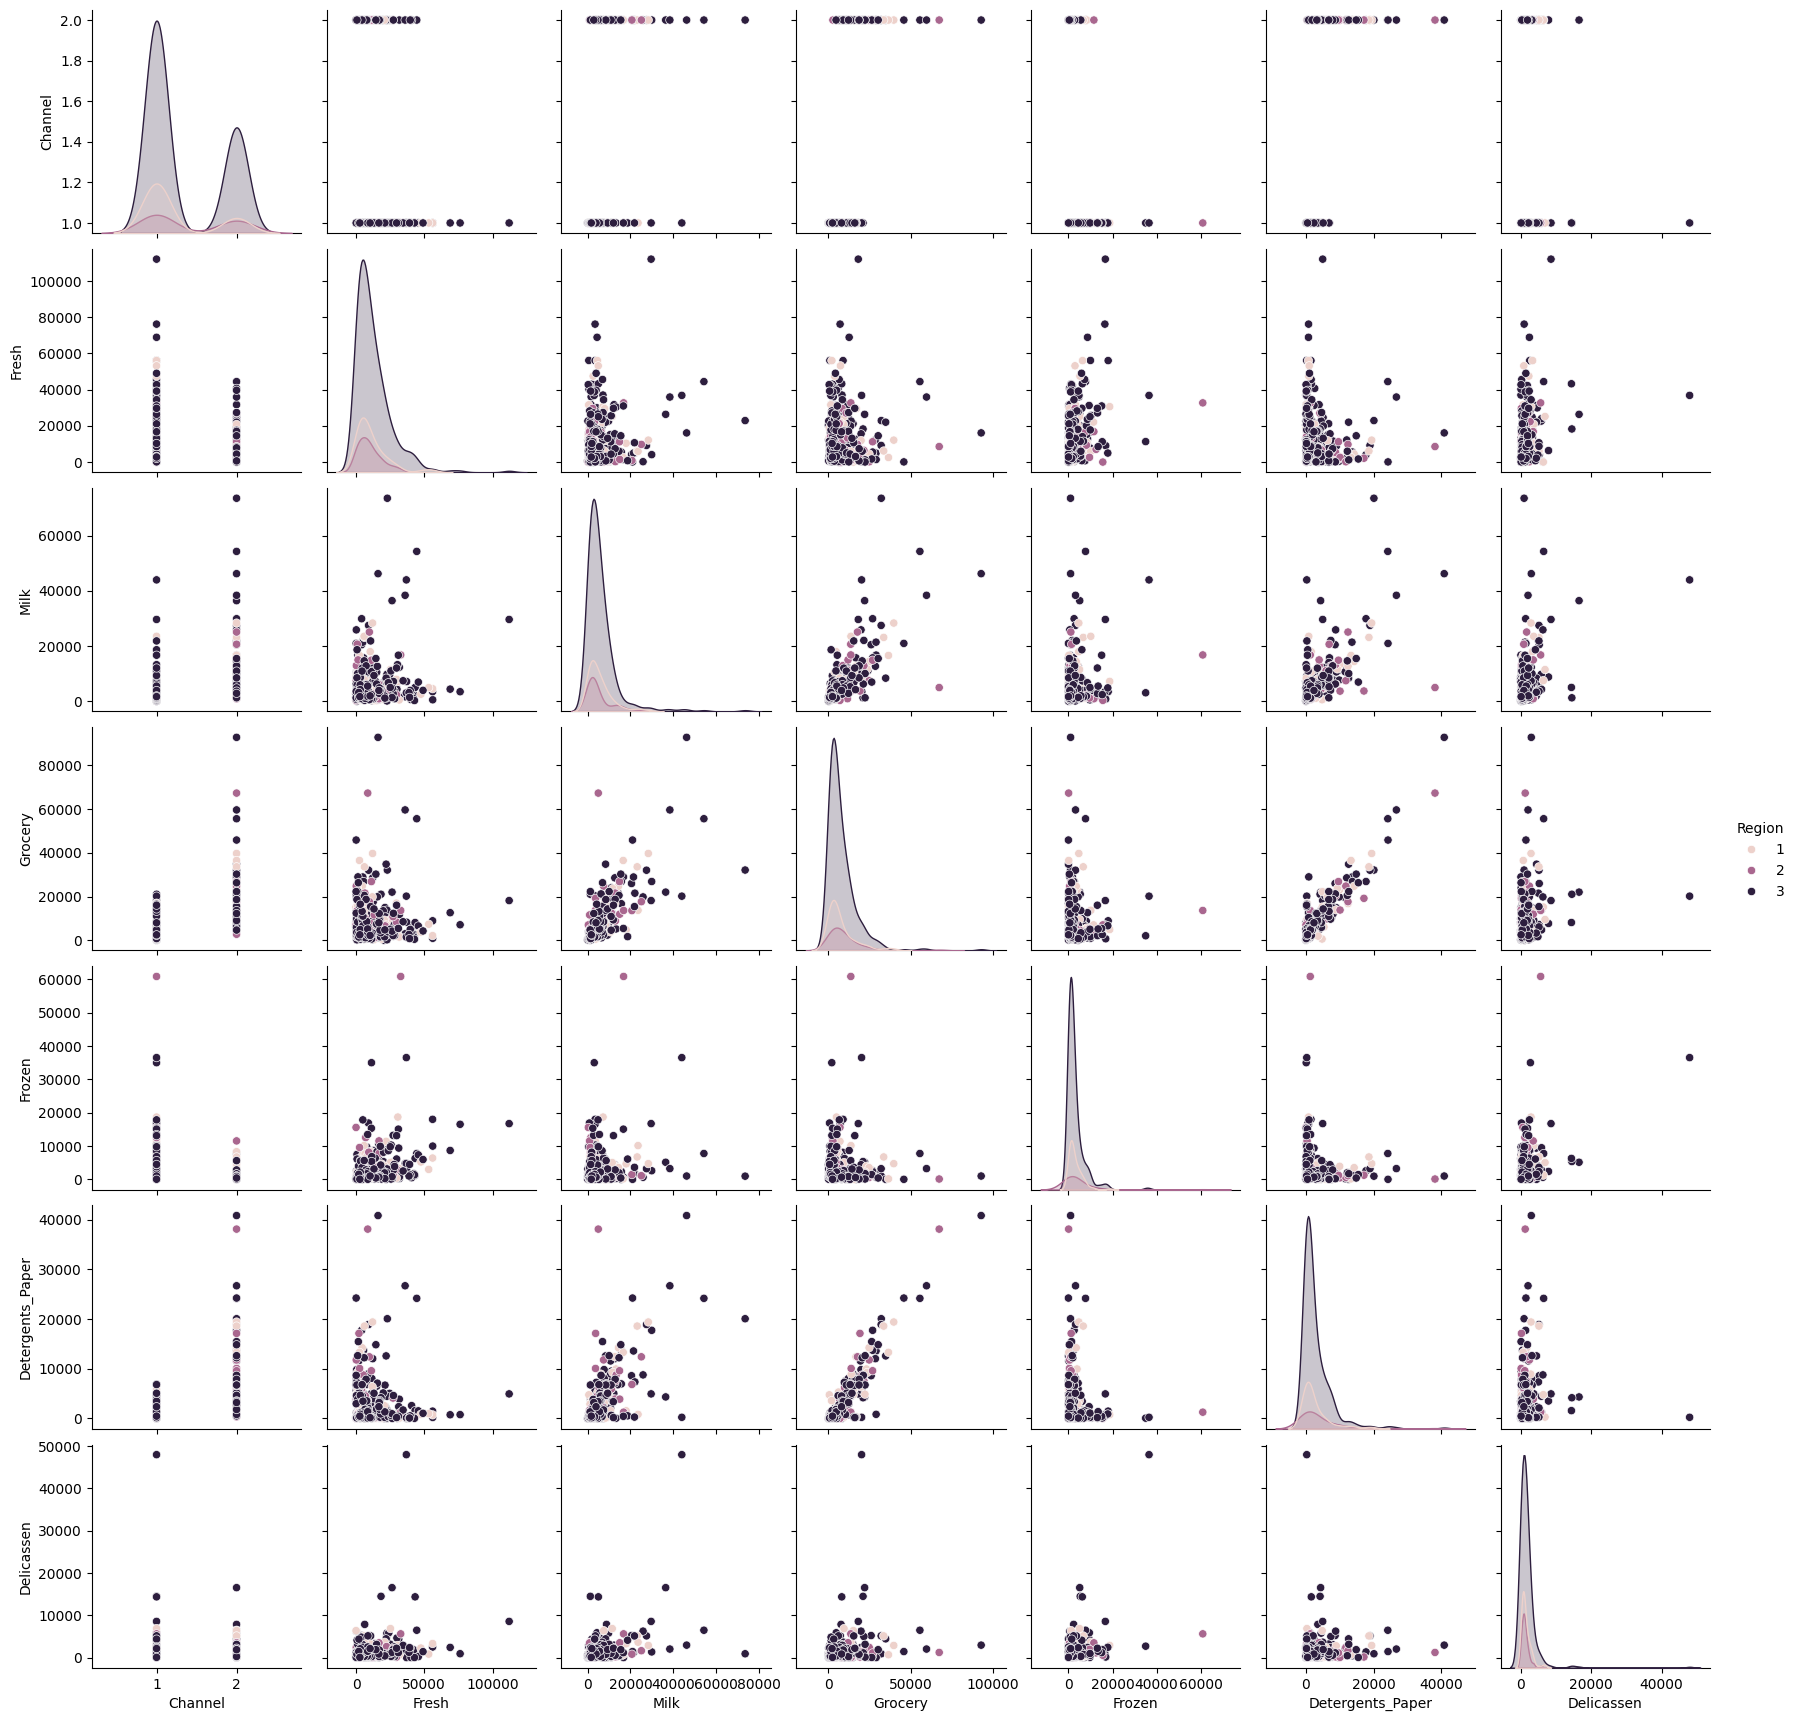

In [41]:
sns.pairplot(data = df, hue = 'Region');

## DBSCAN 

#### Масштабирование данных

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [45]:
X = scaler.fit_transform(df)

In [48]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

#### Создадим набор моделей для различных значений параметра эпсилон с сохранением процента точек-выбросов

In [59]:
from sklearn.cluster import DBSCAN

In [67]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    model = DBSCAN(eps = eps, min_samples = (2*df.shape[1]))
    model.fit(X)

    percent = 100 * np.sum (model.labels_ == -1) / len (model.labels_)
    outlier_percent.append(percent)

#### График lineplot для процента точек-выбросов в зависимости от значений эпсилон

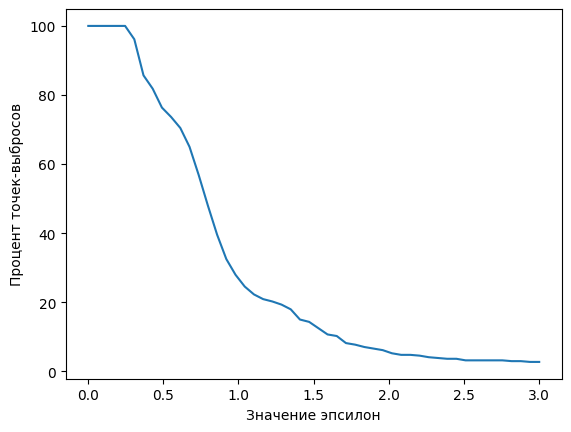

In [76]:
sns.lineplot( x = np.linspace(0.001,3,50), y = outlier_percent)
plt.xlabel('Значение эпсилон')
plt.ylabel('Процент точек-выбросов');

## DBSCAN для выбранного значения эпсилон

#### Создадим модель DBSCAN со значением эпсилон eps=2

In [86]:
dbscan = DBSCAN(min_samples = 2*(df.shape[1]), eps = 2)

In [87]:
dbscan.fit(X)

DBSCAN(eps=2, min_samples=18)

#### График scatterplot для колонок Milk и Grocery по результатам работы модели DBSCAN

In [88]:
result = pd.Series(dbscan.labels_)

In [89]:
df['Labels DBSCAN'] = result

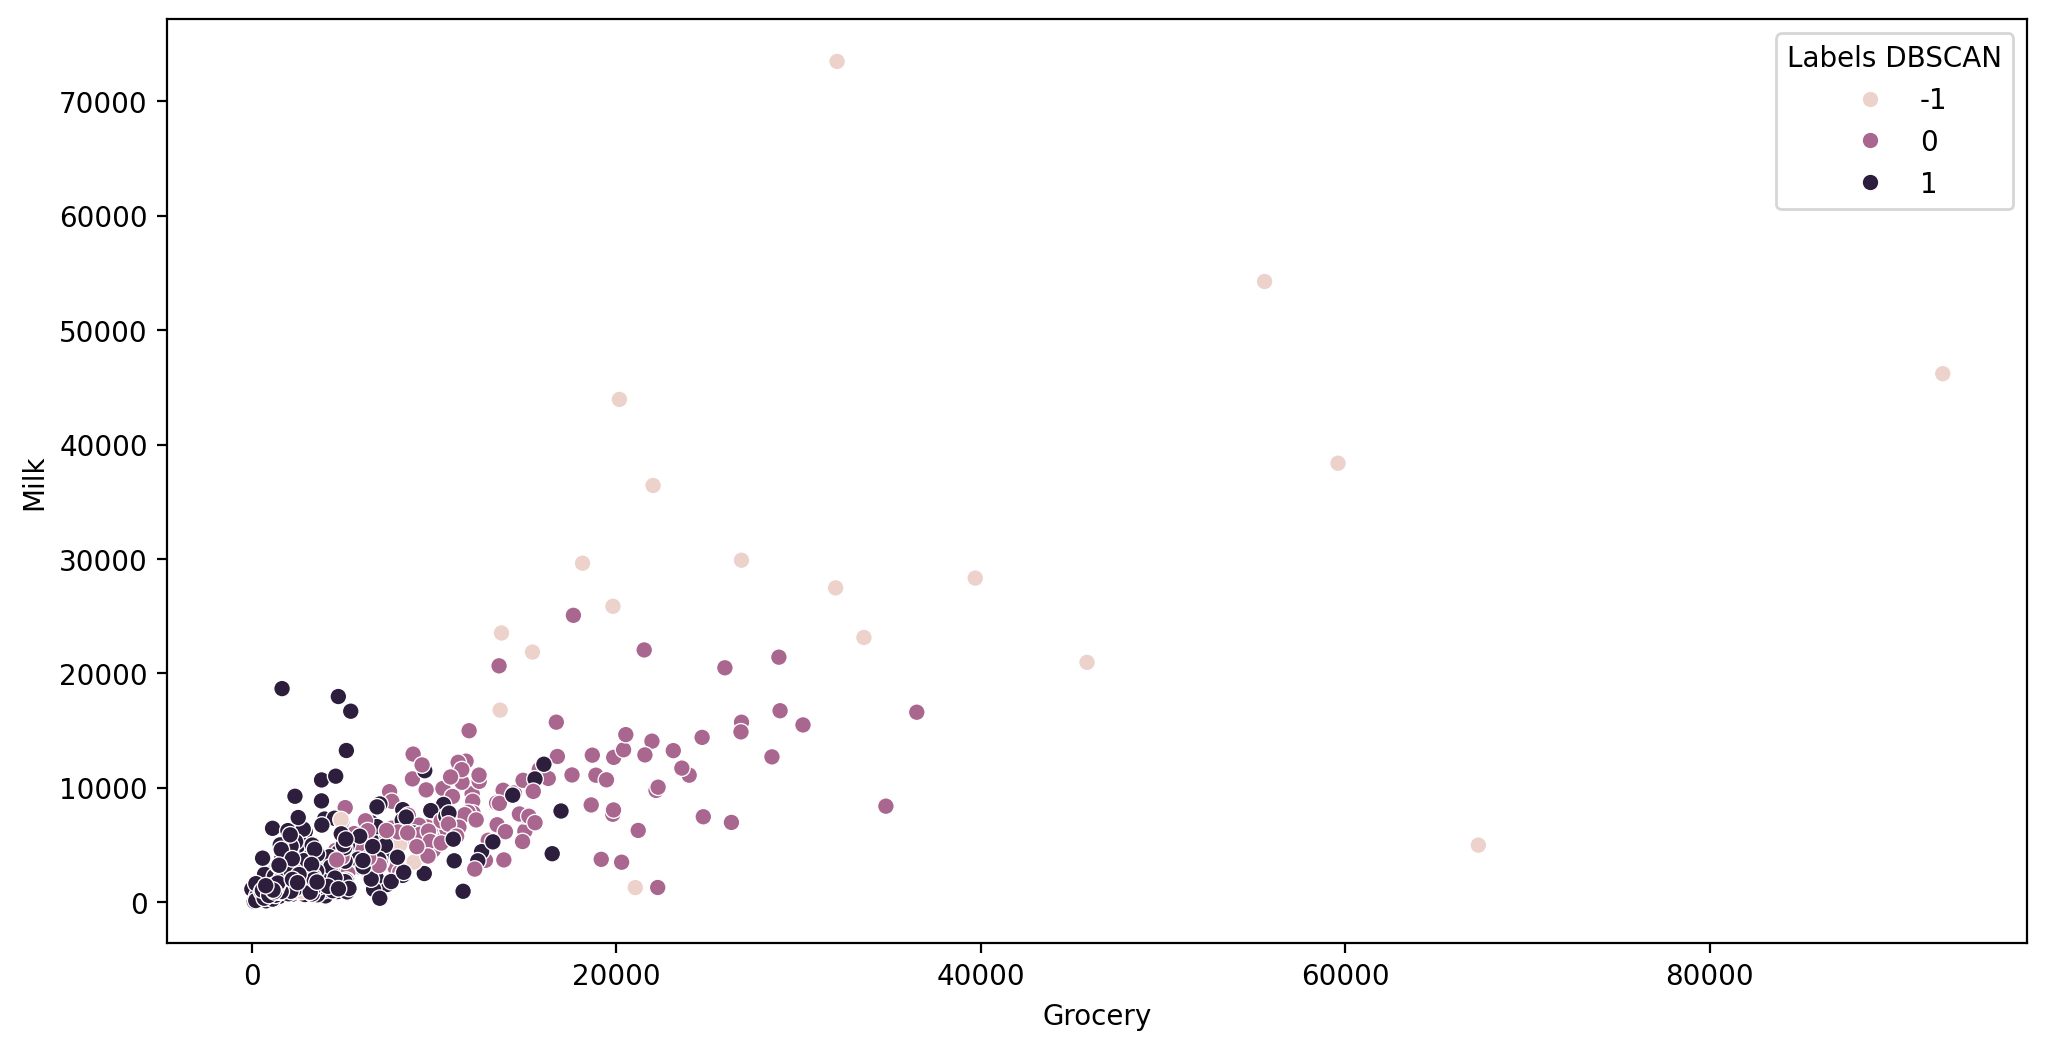

In [96]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot (data = df, y = 'Milk', x = 'Grocery', hue = 'Labels DBSCAN');

#### График scatterplot для колонок Milk и Detergents Paper по результатам работы модели DBSCAN

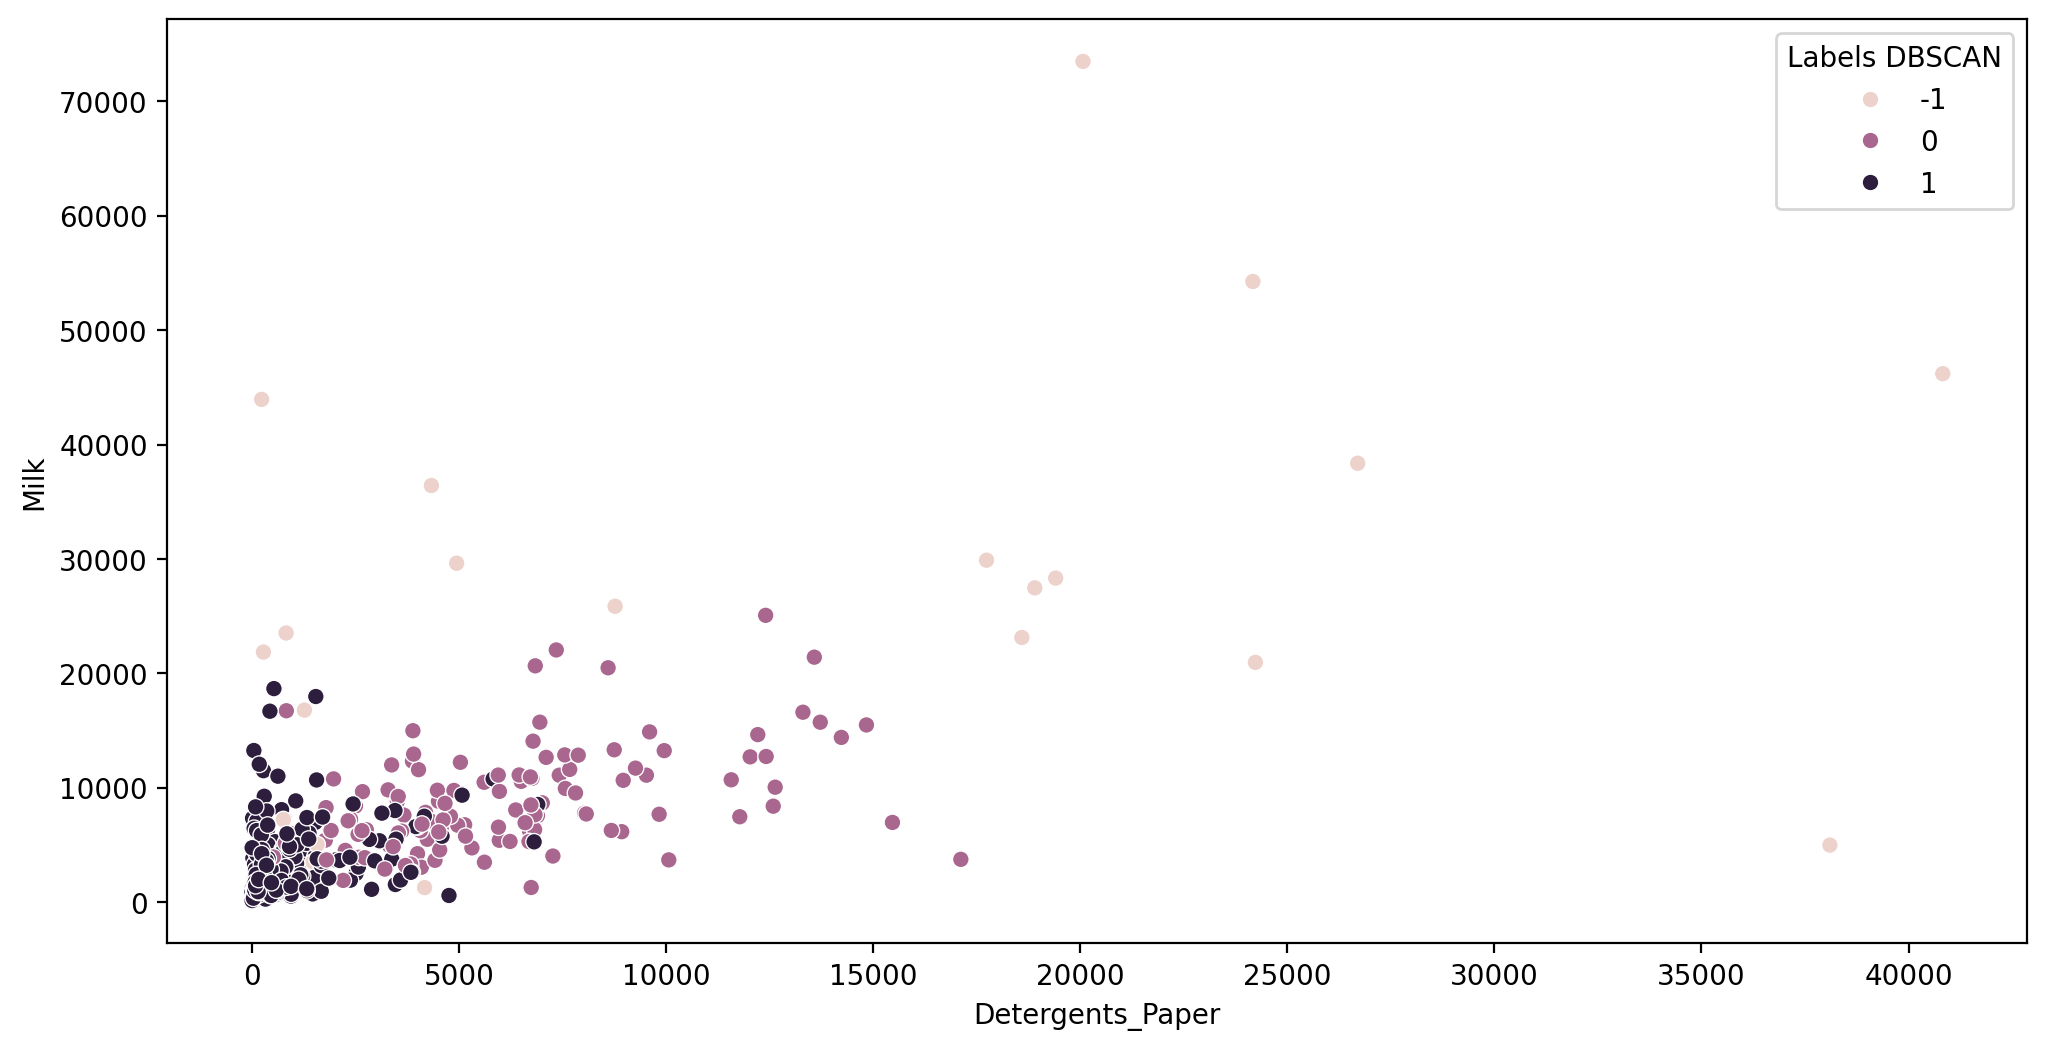

In [100]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot (data = df, y = 'Milk', x = 'Detergents_Paper', hue = 'Labels DBSCAN');

#### Средние значения расходов по различным категорий отдельно для каждого из кластеров

In [101]:
categories = df.drop ([ 'Channel', 'Region'], axis = 1)

In [120]:
categ_means = categories.groupby('Labels DBSCAN').mean()

In [121]:
categ_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels DBSCAN,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


#### Нормализированные значения для дальнейшего анализа

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [122]:
sc_cat = scaler.fit_transform (categ_means)

In [128]:
sc_cat = pd.DataFrame(sc_cat, categ_means.index, categ_means.columns)

In [129]:
sc_cat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels DBSCAN,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


#### Тепловая карта heatmap для получившихся кластеров (вкл. выбросы "-1")

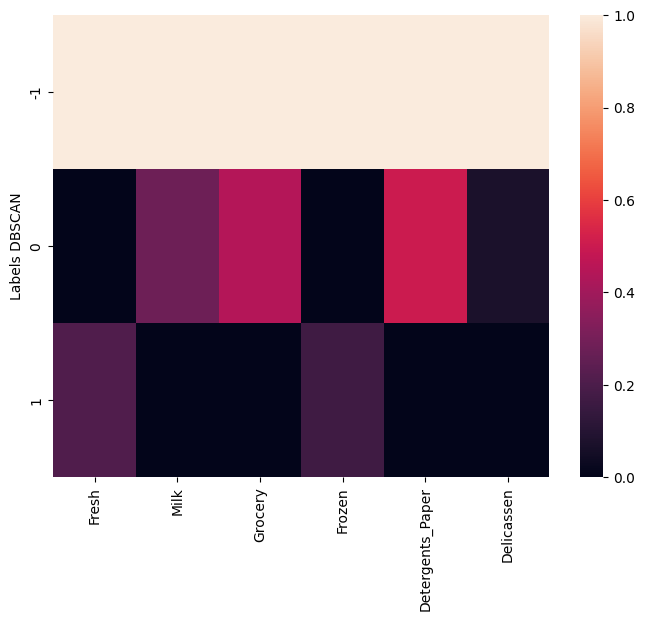

In [133]:
plt.figure (figsize = (8, 6))
sns.heatmap(sc_cat);

#### Тепловая карта heatmap для получившихся кластеров (за исключением выбросов)

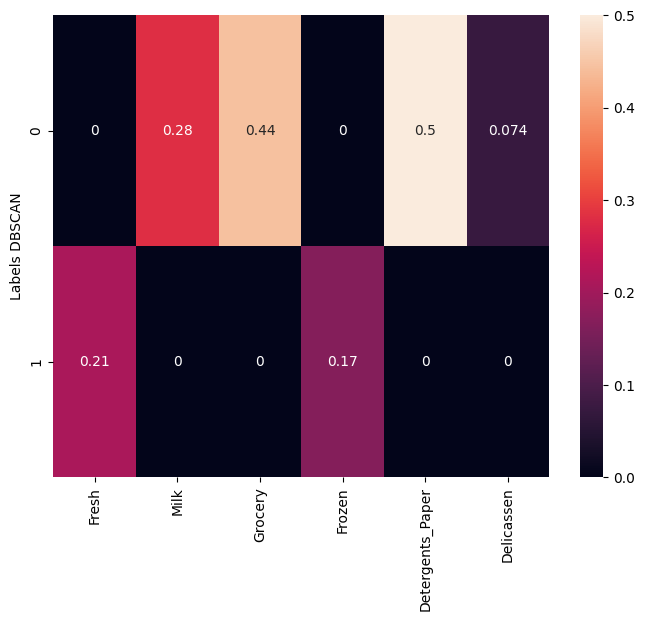

In [138]:
plt.figure (figsize = (8, 6))
sns.heatmap(sc_cat.iloc[[1, 2]], annot = True);